# Model Selection

### In this Project, we are going to predict the Model selection using various features like Brand, Price, Mileage, Fuel Type, Year etc. The data used in this project was getting from unmessenger.

# Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')


# Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# lets check the descriptive summary
car_dataset.describe().style.background_gradient(cmap = 'Greens')

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car_dataset['Age'] = 2020 - car_dataset['Year']
car_dataset.drop('Year',axis=1,inplace = True)

In [9]:
car_dataset.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [10]:
car_dataset.columns


Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

In [11]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name               0
Selling_Price(lacs)    0
Present_Price(lacs)    0
Kms_Driven             0
Fuel_Type              0
Seller_Type            0
Transmission           0
Past_Owners            0
Age                    0
dtype: int64

In [12]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


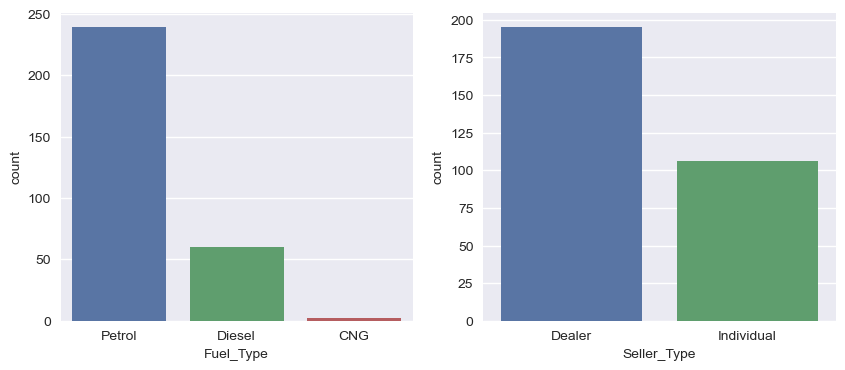

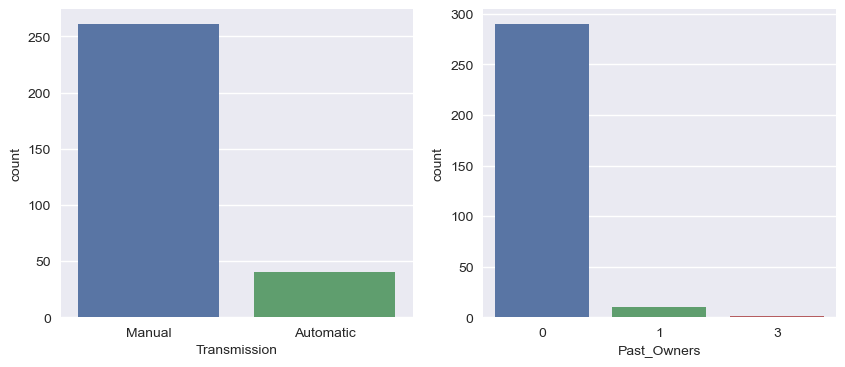

In [13]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=car_dataset)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=car_dataset)
    i += 1
    
    plt.show()

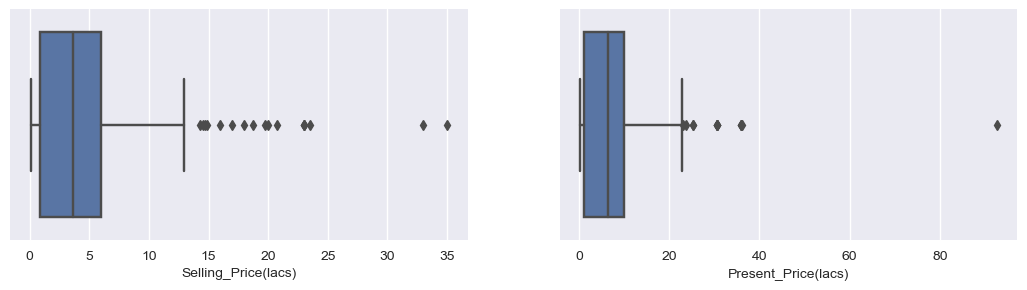

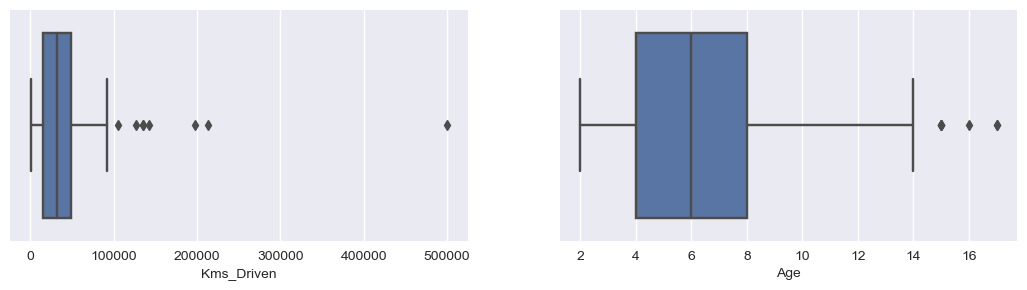

In [14]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=car_dataset)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=car_dataset)
    i += 1
    
    plt.show()


In [15]:
car_dataset[car_dataset['Present_Price(lacs)'] > car_dataset['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [16]:
car_dataset[car_dataset['Selling_Price(lacs)'] > car_dataset['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [17]:
car_dataset[car_dataset['Kms_Driven'] > car_dataset['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12


# Bivariate/Multi-Variate Analysis

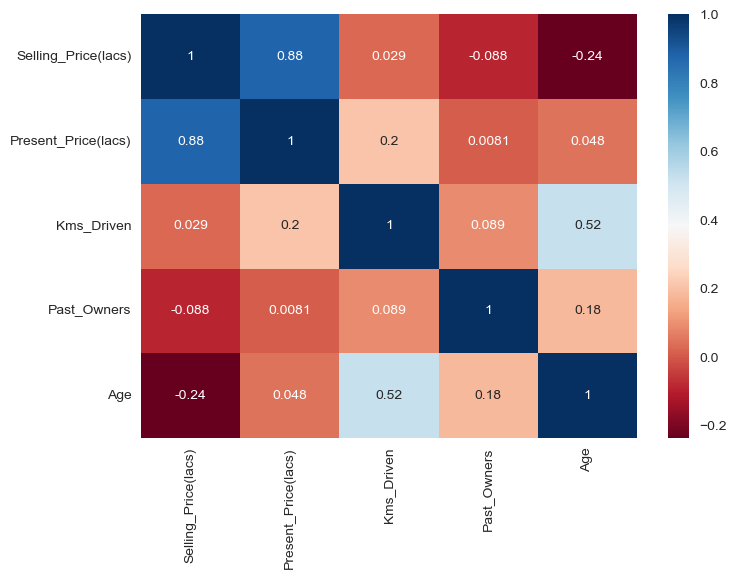

In [18]:
sns.heatmap(car_dataset.corr(), annot=True, cmap="RdBu")
plt.show()

In [19]:
car_dataset.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [20]:
car_dataset.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


In [21]:
car_dataset.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


# Encoding the Categorical Data

In [22]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [23]:
car_dataset.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,0,0,0,0,6
1,sx4,4.75,9.54,43000,1,0,0,0,7
2,ciaz,7.25,9.85,6900,0,0,0,0,3
3,wagon r,2.85,4.15,5200,0,0,0,0,9
4,swift,4.60,6.87,42450,1,0,0,0,6


In [24]:
car_dataset.drop(labels='Car_Name',axis= 1, inplace = True)

In [25]:
car_dataset.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,0,0,0,0,6
1,4.75,9.54,43000,1,0,0,0,7
2,7.25,9.85,6900,0,0,0,0,3
3,2.85,4.15,5200,0,0,0,0,9
4,4.60,6.87,42450,1,0,0,0,6


# Splitting Training and Test data

In [26]:
y = car_dataset['Selling_Price(lacs)']
X = car_dataset.drop('Selling_Price(lacs)',axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [28]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


# Applying regression models

## 1.Linear Regression

## 2.Ridge Regression

## 3.Lasso Regression

## 4.Random Forest Regression

## 5.Gradient Boosting regression

In [29]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

# Linear Regression 

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539]
Train CV mean : 0.84


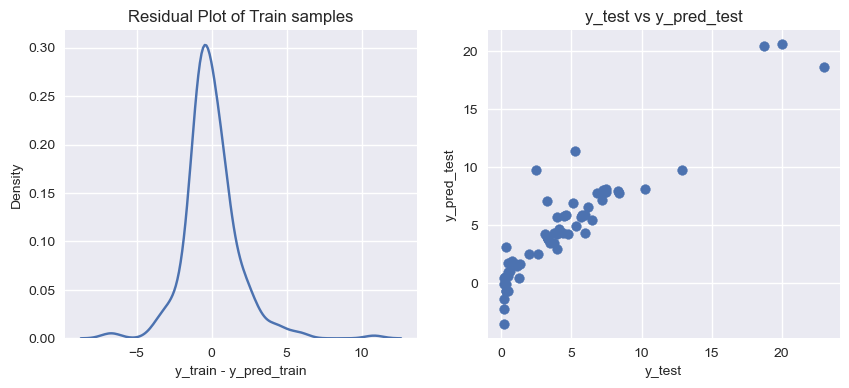

In [30]:
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

# Ridge

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89746522 0.88756704 0.83007616 0.81438296 0.73032163]
Train CV mean : 0.83


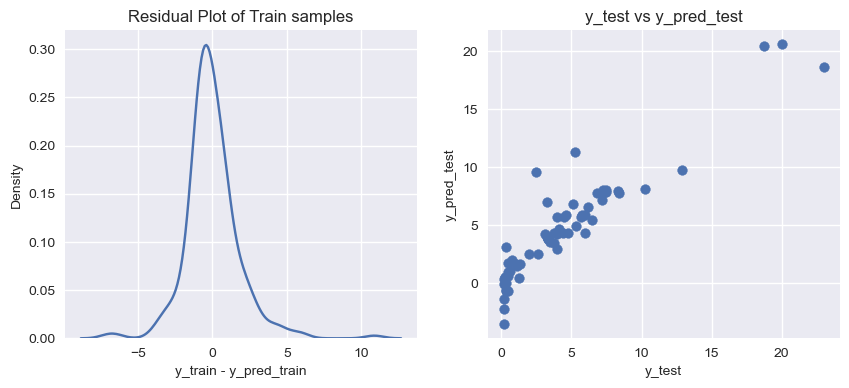

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

Train R2-score : 0.88
Test R2-score : 0.85
Train CV scores : [0.89749254 0.88787064 0.83030033 0.81468893 0.7280004 ]
Train CV mean : 0.83


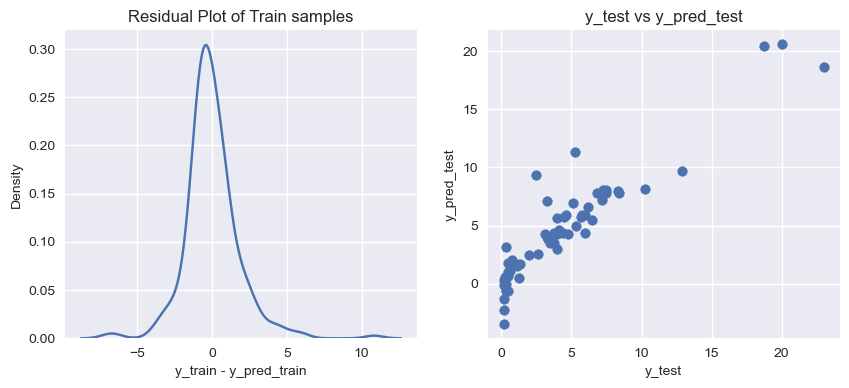

In [33]:
car_pred_model(ls_rs,"lasso.pkl")

# Random Forest

In [34]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.95
Test R2-score : 0.83
Train CV scores : [0.86860994 0.96698829 0.85134718 0.92704461 0.73728982]
Train CV mean : 0.87


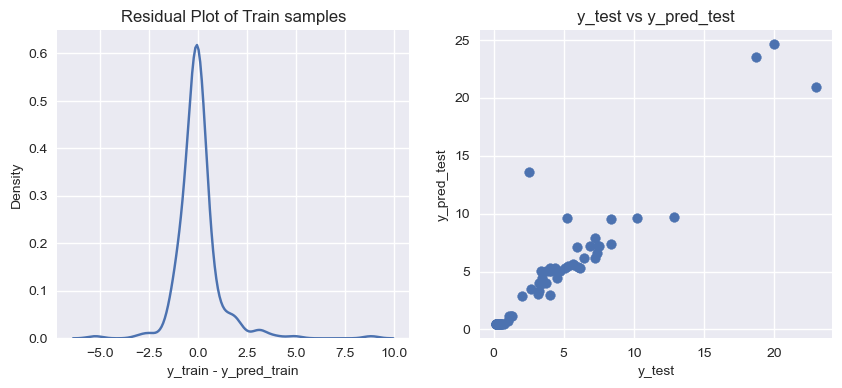

In [35]:
car_pred_model(rf_rs,'random_forest.pkl')

In [36]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=900)


# Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score : 1.0
Test R2-score : 0.74
Train CV scores : [0.87653112 0.91321643 0.89151422 0.94149678 0.64117164]
Train CV mean : 0.85


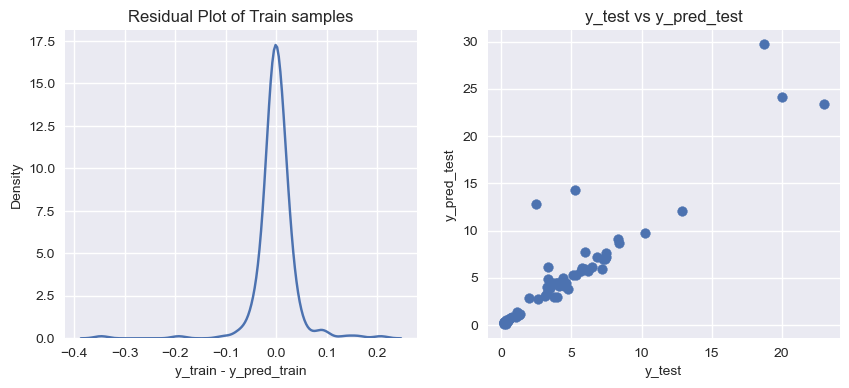

In [39]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [40]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.85,0.84
1,Ridge,0.88,0.85,0.83
2,Lasso,0.88,0.85,0.83
3,RandomForestRegressor,0.95,0.83,0.87
4,GradientBoostingRegressor,1.00,0.74,0.85
